# Generators

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, LeakyReLU, Conv2DTranspose, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = (x_train-127.5)/127.5
x_train = np.expand_dims(x_train, axis = -1)

datasize = 60000
batch_size = 128
latent_dim = 100


def generator(num_dim = 100):
    model = Sequential()
    # Fairly Connect Layer
    model.add(Dense(128*7*7, input_dim = num_dim))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization())
    model.add(Reshape((7, 7, 128)))

    #Sample1
    model.add(Conv2DTranspose(128, kernel_size = 4, strides = 2, padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization())

    #Sample2
    model.add(Conv2DTranspose(128, kernel_size = 4, strides = 2, padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(BatchNormalization())

    #Fianl Layer
    model.add(Conv2DTranspose(1, kernel_size = 3, strides = 1, activation = 'tanh', padding = 'same'))

    return model

In [3]:
Generators = generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [4]:
print(Generators.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       633,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6272)           │        25,088 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │         1,153 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185,281 (4.52 MB)

 Trainable params: 1,172,225 (4.47 MB)

 Non-trainable params: 13,056 (51.00 KB)

None


In [5]:
print(Generators)

<Sequential name=sequential, built=True>


In [6]:
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


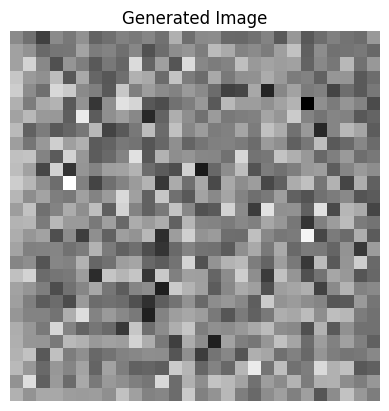

In [7]:
input = np.random.normal(0,1,(1,100))

output = Generators.predict(input)
output1 = (output+1)/2.0

plt.imshow(output1[0,:,:,0], cmap = "grey")
plt.title("Generated Image")
plt.axis("off")
plt.show()


In [8]:
#Discriminator -

def discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size = 3, strides = 2, padding = 'same', input_shape = (28, 28, 1)))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Conv2D(128, kernel_size = 3, strides = 2, padding = 'same'))
    model.add(LeakyReLU(alpha = 0.2))
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))

    return model

In [9]:
Discriminator = discriminator()
Discriminator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,769 (315.50 KB)

 Trainable params: 80,769 (315.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Loss and Optimizers -
cross_entropy = tf.keras.losses.BinaryFocalCrossentropy()
generator = generator()
discriminator = discriminator()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [11]:
# Training step

@tf.function
def training(real_image):
  #Generate Random Noise inout for generator
  input_noise = tf.random.normal([batch_size, latent_dim])

  #Start tracking gradients
  with tf.GradientTape() as des_tap, tf.GradientTape() as gen_tap:
    #Generate Fake Image
    fake_image = Generators(input, training=True)
    #Get discrimination outputs
    real_output = Discriminator(real_image, training=True)
    fake_output = Discriminator(fake_image, training=True)

    #Calculate discriminator loss (real vs fake)
    des_loss_real = cross_entropy(tf.ones_like(real_output),real_output)
    des_loss_fake = cross_entropy(tf.zeros_like(fake_output),fake_output)
    des_loss = des_loss_real + des_loss_fake

    #Calculate generator loss (trying to fool discriminator)
    gen_loss = cross_entropy(tf.ones_like(fake_output),fake_output)

  #Compute the gradients
  gradients_of_des = des_tap.gradient(des_loss,Discriminator.trainable_variables)
  gradients_of_gen = gen_tap.gradient(gen_loss,Generators.trainable_variables)

  #Apply optimizers
  discriminator_optimizer.apply_gradients(zip(gradients_of_des,Discriminator.trainable_variables))
  generator_optimizer.apply_gradients(zip(gradients_of_gen,Generators.trainable_variables))

  return des_loss, gen_loss

In [18]:
#Generate Image
def generate_image(model, epoch):
  input = tf.random.normal([1, latent_dim])
  output = model(input, training=False)
  image = (output[0, :, :, 0] + 1 / 2.0)
  plt.imshow(image, cmap = "grey")
  plt.title(f"Generated Image, {epoch}")
  plt.axis("off")
  plt.show()

In [19]:
#Load Dataset
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#x_train = (x_train-127.5)/127.5
#x_train = np.expand_dims(x_train, axis = 1)
#datasize = 60000
#batch_size = 128
#latent_dim = 100

data = tf.data.Dataset.from_tensor_slices(x_train).shuffle(datasize).batch(batch_size)

In [20]:
print(data)

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float64, name=None)>


In [21]:
#Training Loop
def train(data, epochs = 50):
  for epoch in range(1, epochs+1):
    for i in data:
      d_loss, g_loss = training(i)
    print(f"{epochs} - D_loss {d_loss}, G_loss {g_loss}")

    if epoch % 5 == 1:
      generate_image(generator, epoch=epoch)

In [22]:
for image_batch in data.take(1):
  print(image_batch.shape)

(128, 28, 28, 1)


50 - D_loss 0.0182126984000206, G_loss 1.0922520160675049


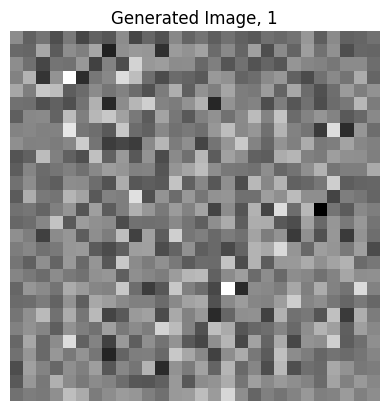

50 - D_loss 0.046866632997989655, G_loss 0.6233456134796143
50 - D_loss 0.08570736646652222, G_loss 0.48993104696273804
50 - D_loss 0.22664307057857513, G_loss 0.5387715101242065
50 - D_loss 0.11355235427618027, G_loss 0.5242016911506653
50 - D_loss 0.045399345457553864, G_loss 0.69626784324646


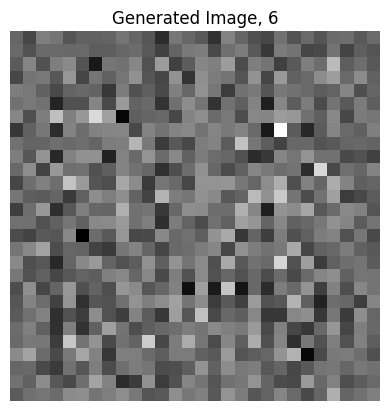

50 - D_loss 0.2660568952560425, G_loss 0.2815655767917633
50 - D_loss 0.0888967290520668, G_loss 0.5350858569145203
50 - D_loss 0.1029382273554802, G_loss 0.5584833025932312
50 - D_loss 0.19571176171302795, G_loss 0.38398441672325134
50 - D_loss 0.03712862730026245, G_loss 0.7029104232788086


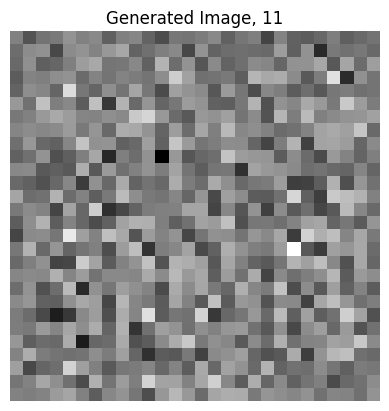

50 - D_loss 0.1191643550992012, G_loss 0.4848463833332062
50 - D_loss 0.5207387208938599, G_loss 0.1056218296289444
50 - D_loss 0.16994163393974304, G_loss 0.3907841444015503
50 - D_loss 0.2031417340040207, G_loss 0.5635871887207031
50 - D_loss 0.19597601890563965, G_loss 0.30255791544914246


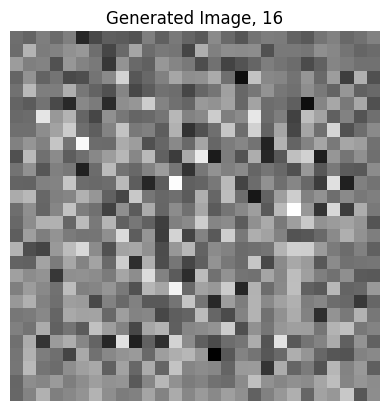

50 - D_loss 0.14179542660713196, G_loss 0.3970184922218323
50 - D_loss 1.1951000690460205, G_loss 0.057956308126449585
50 - D_loss 0.11045588552951813, G_loss 0.5127750635147095
50 - D_loss 0.3804674446582794, G_loss 0.21121163666248322
50 - D_loss 0.12438665330410004, G_loss 0.4145394265651703


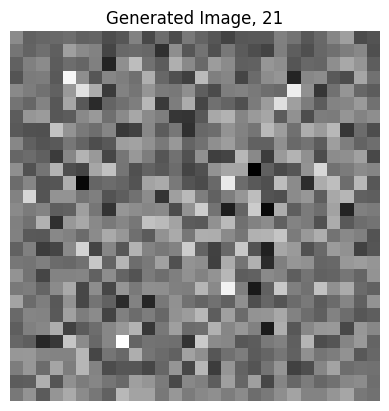

50 - D_loss 0.24453116953372955, G_loss 0.34579557180404663
50 - D_loss 0.3123057186603546, G_loss 0.23876623809337616
50 - D_loss 0.07830704748630524, G_loss 0.5195059180259705
50 - D_loss 0.06821171939373016, G_loss 0.922468364238739
50 - D_loss 0.08120882511138916, G_loss 0.6457090377807617


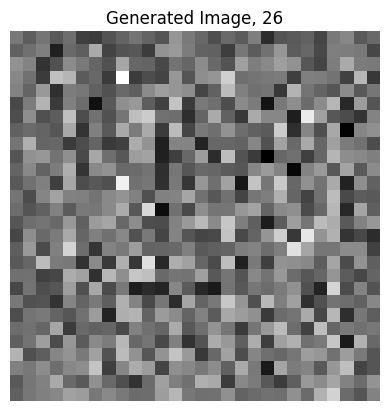

50 - D_loss 0.06303224712610245, G_loss 0.7542774081230164
50 - D_loss 0.06765619665384293, G_loss 0.7101311087608337
50 - D_loss 0.06150992959737778, G_loss 0.6903143525123596
50 - D_loss 0.1977088451385498, G_loss 0.43566983938217163
50 - D_loss 0.17615196108818054, G_loss 0.377197265625


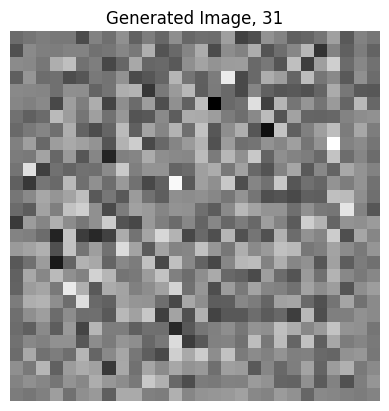

50 - D_loss 0.060402192175388336, G_loss 0.645622968673706
50 - D_loss 0.05010379105806351, G_loss 0.9625028371810913
50 - D_loss 0.25643178820610046, G_loss 0.2794363498687744
50 - D_loss 0.13730046153068542, G_loss 0.4508104622364044
50 - D_loss 0.21010106801986694, G_loss 0.45184949040412903


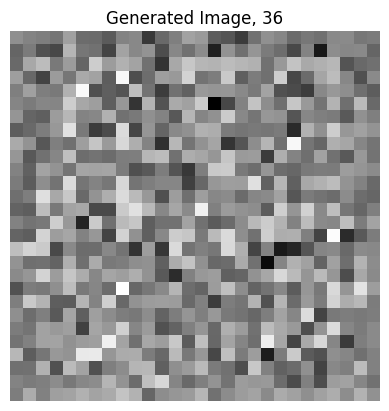

50 - D_loss 0.06658817082643509, G_loss 0.6705834269523621
50 - D_loss 0.06255429238080978, G_loss 0.7843307852745056
50 - D_loss 0.1425224393606186, G_loss 0.6693781614303589
50 - D_loss 0.052726488560438156, G_loss 1.4620864391326904
50 - D_loss 0.13387086987495422, G_loss 0.5943775177001953


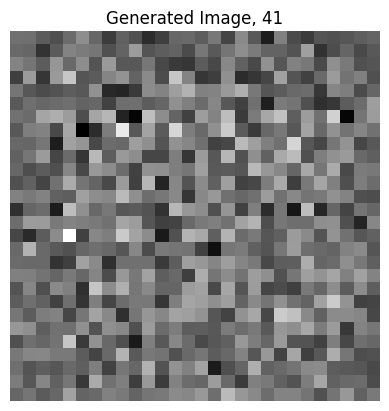

50 - D_loss 0.07659369707107544, G_loss 0.6012096405029297
50 - D_loss 0.015886323526501656, G_loss 0.9763103127479553
50 - D_loss 0.16698291897773743, G_loss 0.4608776271343231
50 - D_loss 0.17453894019126892, G_loss 0.39304324984550476
50 - D_loss 0.1682458221912384, G_loss 0.5683238506317139


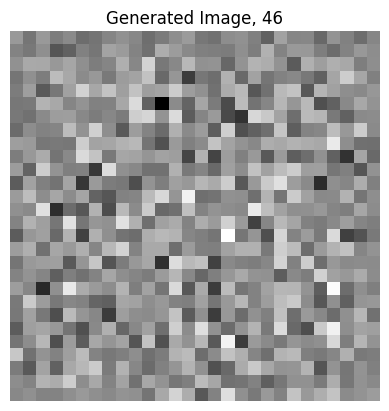

50 - D_loss 0.0445435531437397, G_loss 0.9513524174690247
50 - D_loss 0.04207869619131088, G_loss 1.1686652898788452
50 - D_loss 0.06294010579586029, G_loss 0.5680869817733765
50 - D_loss 0.1440116912126541, G_loss 0.8667116165161133


In [23]:
train(data, epochs = 50)